In [0]:
%matplotlib inline
import pandas as pd


<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/header.png" alt="drawing"/>


A multi-channel electroencephalography (EEG) system enables a broad range of applications including neurotherapy, biofeedback, and brain computer interfacing. The dataset you will analyse is created with the [Emotiv EPOC+](https://www.emotiv.com/product/emotiv-epoc-14-channel-mobile-eeg).  

It has 14 EEG channels with names based on the International 10-20 locations: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4:

<br/>
<br/>
<center>
<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/EEG.png" alt="drawing" width="200"/>
<center/>
<br/>
<br/>


All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. 

The experiment was conducted on one person only. The duration of the measurement was around 117 seconds.

From the paper:

> *The experiment was carried out in a quiet room. During
the experiment, the proband was being videotaped. To prevent
artifacts, the proband was not aware of the exact start time
of the measurement. Instead, he was told to sit relaxed, look
straight to the camera, and change the eye state at free will.
Only additional constraint was that, accumulated over the
entire session, the duration of both eye states should be about
the same and that the individual intervals should vary greatly
in length (from eye blinking to longer stretches)...*

The eye state was detected via a camera during the EEG measurement and later added manually to the file after analyzing the video frames. 

A label '1' indicates the eye-closed and '0' the eye-open state.

(*Source: Oliver Roesler, Stuttgart, Germany*)

Let's load the train and test set:

In [0]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

sample_submission = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/sample_submission.csv")


You will fit a model on the trainset and make predictions on the testset. 

To submit these predictions to Kaggle you need to write a .csv file with two columns: 
- `index` that matches the `index` column in the test set.
- `label` which is your prediction.

Here is an example predictions file for Kaggle:

In [491]:
sample_submission.head(10)

,index,label
0,0,0.168801
1,1,0.124169
2,2,0.947757
3,3,0.069585
4,4,0.635325
5,5,0.659027
6,6,0.653697
7,7,0.850030
8,8,0.160489
9,9,0.843272


Make sure to save your results without the extra Pandas index column that is written by default:

In [492]:
train_label = trainset.pop('label')
print (trainset)
print (testset)
# lets first remove the index column on the testset

          AF3       F7       F3      FC5  ...      FC6       F4       F8      AF4
0     4299.49  3997.44  4277.95  4116.92  ...  4211.79  4278.97  4600.00  4369.23
1     4302.05  3985.64  4261.03  4129.74  ...  4195.90  4283.08  4607.18  4358.46
2     4321.03  4015.90  4265.13  4122.56  ...  4155.38  4286.15  4608.21  4371.79
3     4408.21  4104.10  4380.00  4232.31  ...  4319.49  4388.21  4715.90  4464.10
4     4347.18  3975.38  4266.67  4102.56  ...  4248.21  4313.33  4664.10  4411.79
...       ...      ...      ...      ...  ...      ...      ...      ...      ...
1995  4211.79  4015.90  4230.26  4107.69  ...  4168.72  4240.51  4544.62  4265.13
1996  4268.72  4035.38  4237.95  4112.82  ...  4189.74  4250.77  4586.67  4321.54
1997  4287.69  4007.69  4267.18  4128.21  ...  4192.82  4260.51  4597.44  4353.33
1998  4297.95  4031.79  4275.90  4147.69  ...  4210.77  4279.49  4604.10  4340.51
1999  4303.08  4010.26  4270.77  4148.21  ...  4217.44  4281.54  4626.67  4349.23

[2000 rows x 14

In [493]:
testset.pop('index')
print (trainset)
print (testset)
# the features seem to be centered around 4000 ? 

          AF3       F7       F3      FC5  ...      FC6       F4       F8      AF4
0     4299.49  3997.44  4277.95  4116.92  ...  4211.79  4278.97  4600.00  4369.23
1     4302.05  3985.64  4261.03  4129.74  ...  4195.90  4283.08  4607.18  4358.46
2     4321.03  4015.90  4265.13  4122.56  ...  4155.38  4286.15  4608.21  4371.79
3     4408.21  4104.10  4380.00  4232.31  ...  4319.49  4388.21  4715.90  4464.10
4     4347.18  3975.38  4266.67  4102.56  ...  4248.21  4313.33  4664.10  4411.79
...       ...      ...      ...      ...  ...      ...      ...      ...      ...
1995  4211.79  4015.90  4230.26  4107.69  ...  4168.72  4240.51  4544.62  4265.13
1996  4268.72  4035.38  4237.95  4112.82  ...  4189.74  4250.77  4586.67  4321.54
1997  4287.69  4007.69  4267.18  4128.21  ...  4192.82  4260.51  4597.44  4353.33
1998  4297.95  4031.79  4275.90  4147.69  ...  4210.77  4279.49  4604.10  4340.51
1999  4303.08  4010.26  4270.77  4148.21  ...  4217.44  4281.54  4626.67  4349.23

[2000 rows x 14

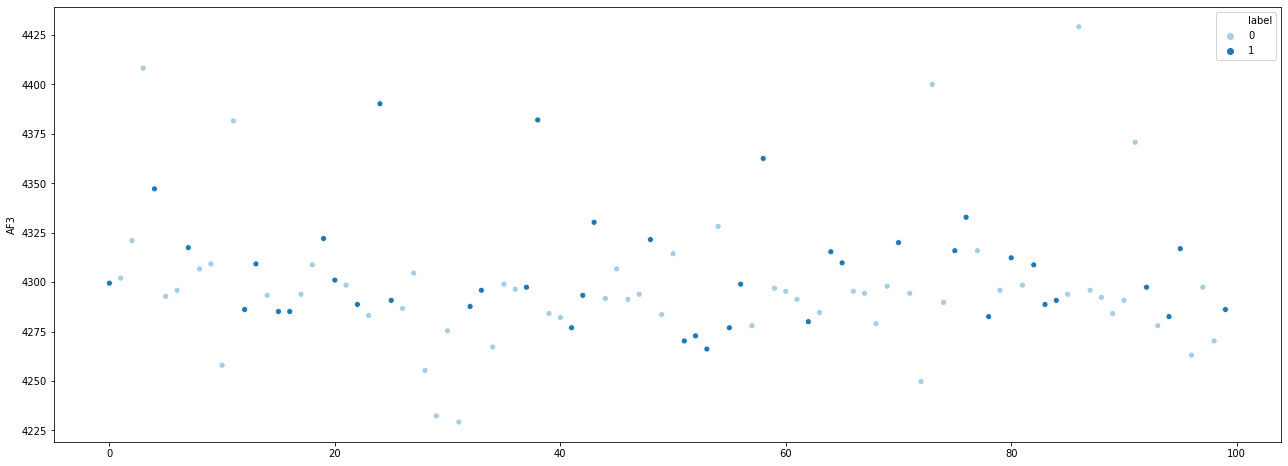

In [494]:
# lets visualize the trainset 
import matplotlib.pyplot as plt
import seaborn as sns
index = trainset.iloc[:100,].index
plt.figure(figsize=(22,8))
sns.scatterplot(x = index , y = trainset['AF3'].iloc[:100,] , hue = train_label.iloc[:100,], palette='Paired')


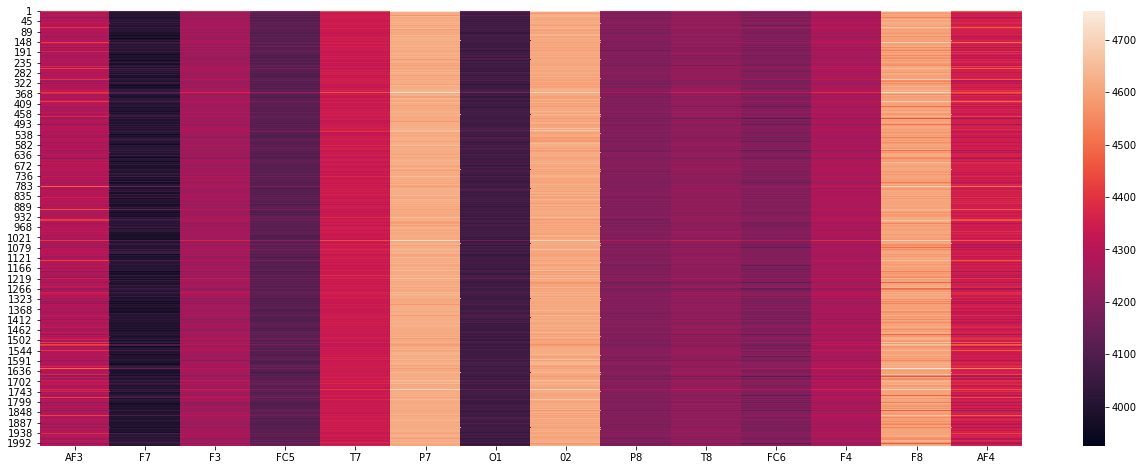

In [495]:
plt.figure(figsize=(22,8))
sns.heatmap(trainset[train_label==0] )
plt.show()

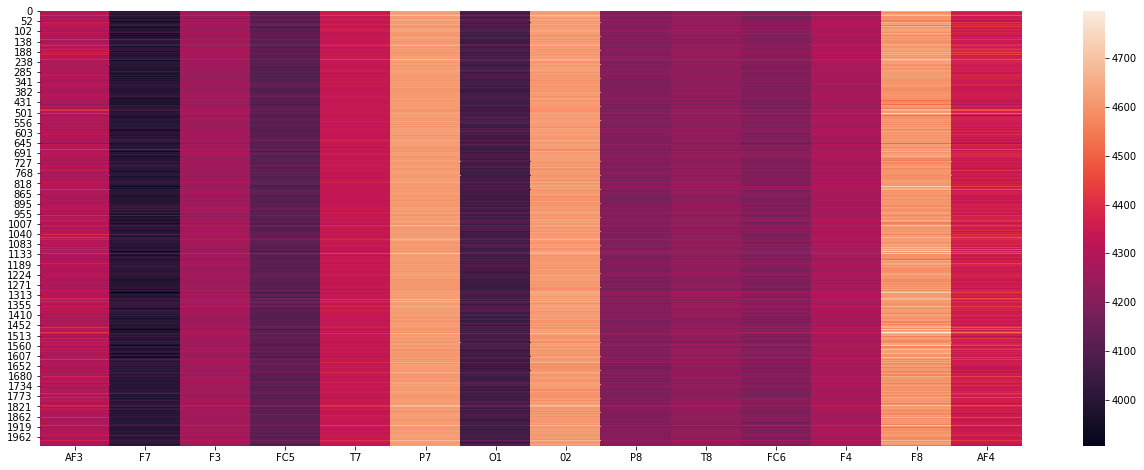

In [496]:
plt.figure(figsize=(22,8))
sns.heatmap(trainset[train_label==1] )
plt.show()

In [497]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

x = trainset.copy()

model = LinearRegression()
cols = x.columns
for degree in [2,3]:
  for column in cols :
    x[column+'^{}'.format(degree)] = x[column]**degree


scores = cross_val_score(model , x , train_label , cv = 10 , scoring= 'roc_auc').mean()

print(scores)

0.8117946092885047


In [0]:
# here I tryed some different degrees to find the highest auc score

In [498]:
# centering all the features around 0 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(trainset)

trainset_scaled = scaler.transform(trainset)

testset_scaled = scaler.transform(testset)


trainset_scaled = pd.DataFrame(trainset_scaled ,columns= trainset.columns )
testset_scaled = pd.DataFrame(testset_scaled ,columns= testset.columns )
print(trainset_scaled.shape)
print(testset_scaled.shape)

(2000, 14)
(12892, 14)


In [499]:

x = trainset_scaled.copy()

model = LinearRegression()
cols = x.columns
for degree in [2,3,4,5,6,7,8]:
  for column in cols :
    x[column+'^{}'.format(degree)] = x[column]**degree


scores = cross_val_score(model , x , train_label , cv = 10 , scoring= 'roc_auc').mean()

print(scores)

# i was able to achieve a higher auc score with the transformed data 

0.8287718865802505


In [500]:

#transform the test and train datasets 

cols = trainset_scaled.columns
for degree in [2,3,4,5,6,7,8]:
  for column in cols :
    trainset_scaled[column+'^{}'.format(degree)] = trainset_scaled[column]**degree

cols = testset_scaled.columns
for degree in [2,3,4,5,6,7,8]:
  for column in cols :
    testset_scaled[column+'^{}'.format(degree)] = testset_scaled[column]**degree



#fit the model and make predictions 

model.fit(trainset_scaled,train_label)

predictions = model.predict(testset_scaled)

predictions

#predict_proba does not work for linearregression ? 

array([0.23157177, 0.37291492, 0.16290263, ..., 0.65175402, 0.80986067,
       0.34435218])

In [501]:
my_prediction_results = pd.DataFrame({'index': testset.index , 'label': predictions})
my_prediction_results

,index,label
0,0,0.231572
1,1,0.372915
2,2,0.162903
3,3,1.015953
4,4,0.840602
...,...,...
12887,12887,0.567466
12888,12888,0.542574
12889,12889,0.651754
12890,12890,0.809861


In [0]:
filename = "my_prediction_results.csv"

#make sure to not write the Pandas index column (index=False)

my_prediction_results.to_csv(filename , index= False)